In [1]:
import librosa
import os
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
df_dict = {'filename': [], 'duration (s)': []}

In [3]:
for root, _, filenames in os.walk('../Data/'):
    for filename in filenames:
        if filename.endswith('mp4'):
            df_dict['filename'].append(os.path.join(root, filename))
            df_dict['duration (s)'].append(librosa.get_duration(filename=os.path.join(root, filename)))

In [4]:
df_dict['singer'] = [val.split('_', 1)[0].rsplit('/', 1)[1] for val in df_dict['filename']]
df_dict['raag'] = [val.rsplit('_', 1)[1].rsplit('.', 1)[0] for val in df_dict['filename']]
df_dict['set'] = [val.split('../Data/', 1)[1].split('/', 1)[0] for val in df_dict['filename']]

In [5]:
df = pd.DataFrame(df_dict)

In [6]:
df.groupby(by=['set']).sum()

,duration (s)
set,
Alap,10501.2
Pakad,1113.4


In [18]:
df.groupby(by=['singer', 'set']).max()

filename  duration (s)  \
singer set                                                                  
AG     Alap        ../Data/Alap/AG_9b_Shree/AG_9b_Shree.mp4         192.0   
       Pakad      ../Data/Pakad/AG_P9_Bilas/AG_P9_Bilas.mp4          19.8   
CC     Alap        ../Data/Alap/CC_9b_Bahar/CC_9b_Bahar.mp4         221.0   
       Pakad      ../Data/Pakad/CC_P9_Bahar/CC_P9_Bahar.mp4          96.8   
SCh    Alap      ../Data/Alap/SCh_9b_Bahar/SCh_9b_Bahar.mp4         213.4   
       Pakad  ../Data/Pakad/SCh_P9b_Bahar/SCh_P9b_Bahar.mp4          26.6   

               raag  samples  
singer set                    
AG     Alap   Shree   21.500  
       Pakad  Shree   -0.025  
CC     Alap   Shree   25.125  
       Pakad  Shree    9.600  
SCh    Alap   Shree   24.175  
       Pakad  Shree    0.825

In [8]:
df.groupby(by=['raag', 'set']).median()

duration (s)
raag  set                
Bag   Alap         189.85
      Pakad         16.90
Bahar Alap         182.85
      Pakad         17.15
Bilas Alap         184.65
      Pakad         26.40
Jaun  Alap         181.20
      Pakad         17.95
Kedar Alap         186.45
      Pakad         18.05
MM    Alap         188.00
      Pakad         21.55
Marwa Alap         191.50
      Pakad         18.35
Nand  Alap         190.20
      Pakad         18.70
Shree Alap         200.05
      Pakad         19.50

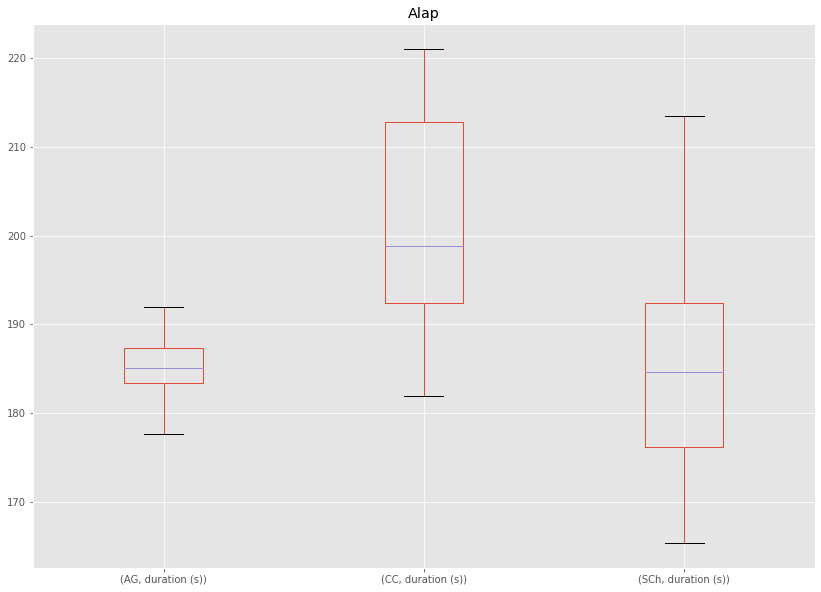

In [9]:
df.loc[df['set'] == 'Alap'].groupby(by=['singer']).boxplot(subplots=False, figsize=(14, 10))
plt.title('Alap')
plt.savefig('../Figs/duration-alap.jpg')

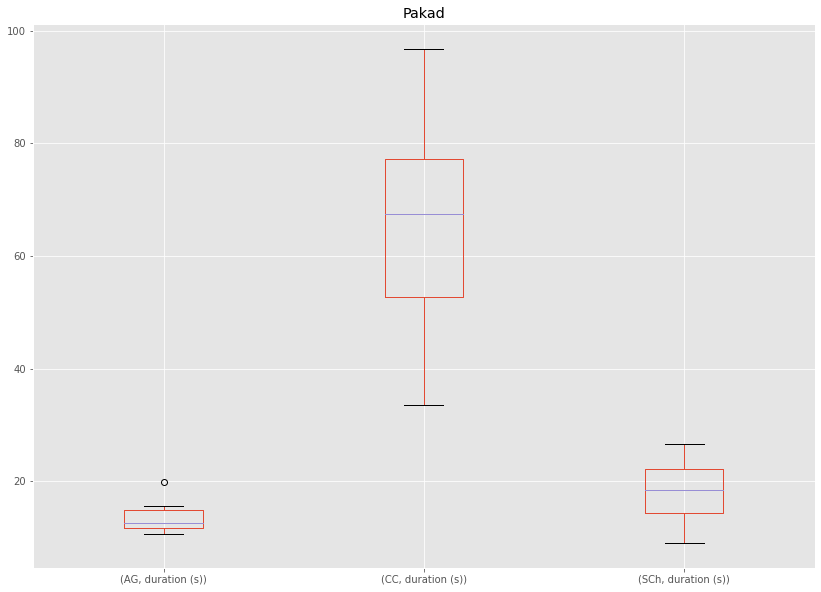

In [10]:
df.loc[df['set'] == 'Pakad'].groupby(by=['singer']).boxplot(subplots=False, figsize=(14, 10))
plt.title('Pakad')
plt.savefig('../Figs/duration-pakad.jpg')

In [11]:
df.loc[(df['duration (s)'] < 15) & (df['set'] == 'Pakad')].count()

filename        12
duration (s)    12
singer          12
raag            12
set             12
dtype: int64

In [26]:
hop_size=1.6
df['samples'] = (df['duration (s)']-12)/hop_size
df.loc[df['samples'] < 0, 'samples'] = 1

In [28]:
df.loc[df['set'] == 'Pakad', 'samples'].sum()

430.0

In [30]:
df.loc[df['set'] == 'Alap', 'duration (s)'].mean()

190.93090909090904